# Time Series - Atic Workshop 2025

**Lesgevers**: Lien De Backer en Jakob De Vreese  

## Introductie

Veel **beslissingsondersteunende toepassingen** steunen op een _voorspelling_ van een bepaalde grootheid. Helaas is voorspellen zowel op korte als op lange termijn erg moeilijk. Voorspellingen zijn meestal gebaseerd op historische gegevens. Analisten zoeken naar _patronen_ of _relaties_ in de **historische gegevens** en maken vervolgens **voorspellingen**. Aan deze aanpak kleven twee problemen.  

1. Het is niet altijd even eenvoudig om historische patronen of relaties (corelaties) te detecteren en/of te verklaren. In het bijzonder is het vaak moeilijk om de ruis, meetfouten, of het willekeurige gedrag, te scheiden van de **onderligende patronen**. In deze workshop zal je ook zien dat in het veld van HVAC meetfouten, vervuilde data en slecht gekozen meetpunten vaak een grote struikelblok zijn.
2. Er is geen garantie dat patronen uit het verleden in de toekomst zullen aanhouden. Er kan ergens in de wereld een nieuwe oorlog uitbreken, een pandemie ontstaan, de beurs kan instorten,... Om deze redenen is het dus ook belangrijk dat we resultaten en voorspellingen blijven interpreteren en dieper analyseren, en deze naar waarde schatten.

## Extrapolatiemodellen

Extrapolatiemodellen zijn kwantitatieve modellen die historische gegevens van een tijdreeksvariabele gebruiken om toekomstige waarden van die variabele te voorspellen. Het idee is dat historische bewegingen van een variabele, zoals bedrijfsverkopen of Belgische export naar Duitsland, kunnen worden gebruikt om toekomstige waarden te voorspellen.  
Er bestaat een breed scala aan extrapolatiemodellen, waaronder **voortschrijdende gemiddelden** en **exponentiële vergladding**. Deze modellen zoeken naar patronen in de historische reeks en extrapoleren die vervolgens naar de toekomst. Sommige proberen opwaartse of neerwaartse langetermijntrends te volgen en te projecteren. Andere proberen seizoenspatronen te volgen (zoals een toename van de verkoop in november en december en een daling in andere maanden) en projecteren die vervolgens.

### Componenten van tijdreeksgegevens

Er zijn vier belangrijke componenten van een tijdreeks: de `trendcomponent`, de `seizoenscomponent`, de `cyclische component` en de `willekeurige component` (ruis).

![](img/time_series_components.jpg)

Wanneer de waarnemingen in de tijd regelmatig toenemen of afnemen, zeggen we dat de tijdreeks een **trend** vertoont.

Veel tijdreeksen hebben een **seizoenscomponent**. Zo zal de verkoop van een bedrijf dat zwembadbenodigdheden verkoopt elk voorjaar toenemen, relatief hoog blijven in de zomer en vervolgens dalen tot het volgende voorjaar, waarna het jaarlijkse patroon zich herhaalt. Een belangrijk aspect van de seizoenscomponent is dat deze van jaar tot jaar voorspelbaar is. Elk jaar neigt hetzelfde seizoenspatroon zich te herhalen.

Er is sprake van een **cyclisch patroon** wanneer gegevens stijgingen en dalingen vertonen die geen vaste periode hebben. Tijdens een recessie dalen doorgaans de woningverkopen, stijgt de werkloosheid, dalen de aandelenkoersen, enzovoort. Wanneer de recessie voorbij is, bewegen al deze variabelen doorgaans in de omgekeerde richting.  
Als de schommelingen geen vaste periode hebben, zijn ze cyclisch; als de periode constant is en samenhangt met een aspect van de kalender, dan is het patroon seizoensgebonden.

De **willekeurige component (of ruis)** is het onvoorspelbare onderdeel dat veel tijdreeksdiagrammen hun grillige, zigzagvormige uiterlijk geeft. Doorgaans kan een tijdreeks slechts gedeeltelijk worden bepaald door de trend-, seizoens- en cyclische componenten; andere factoren bepalen de rest. Dit kunnen inherente willekeur, onvoorspelbare “schokken” in het systeem, het onvoorspelbare gedrag van mensen die met het systeem interageren, en mogelijk andere factoren zijn.

## 🎯 Doel van deze notebook

Deze notebook is een **praktisch naslagwerk** voor tijdreeksanalyse met herbruikbare code-modules. In plaats van een klassieke oefening, bieden we je een gestructureerde collectie van veelgebruikte technieken en tools die je direct kunt toepassen in je eigen analyses.

### Wat je leert:

- Data inlezen en datumkolommen parsen naar een DatetimeIndex (frequentie instellen)
- Basisvisualisaties van tijdreeksen (tijdlijn, markers, subplots)
- Trenddetectie: lineaire regressie en polynomiale fits
- Voortschrijdende gemiddelden (SMA) en exponentiële afvlakking (EMA)
- Enkele, dubbele (Holt) en drievoudige (Holt‑Winters / TES) exponentiële afvlakking
- Train/test-splits, forecast maken en resultaten visualiseren
- Modelevaluatie (MAE, MSE, √MSE) en interpretatie van prestaties
- Tijdreeksdecompositie (trend / seizoen / residuen) met seasonal_decompose
- Rolling- en EWM-methodes voor gladstrijken en korte termijn voorspellingen
- Gebruik van statsmodels en scikit-learn voor modellering en diagnostiek
- Praktische stappen voor het opbouwen, valideren en interpreteren van voorspellingsmodellen

### Hoe te gebruiken:
Deze notebook is opgebouwd als een **modulaire toolbox**. Je kunt secties onafhankelijk gebruiken en code hergebruiken in je eigen analyses. Elk onderdeel bevat praktische voorbeelden die je kunt aanpassen aan je specifieke use case.

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

> _Je kan in de volgende notebook `1_Introductie` enkele tips lezen over de **Package imports** en hoe je dit goed kan aanpaken, evenals hoe je als een echte data scientist jouw omgeving kan instellen!_

## Time Series

### 📥 Inlezen van de data

Voor deze demonstratie maken we gebruik van een **dataset met het aantal herstelaanvragen** voor HVAC-installaties die in een bepaalde maand zijn ingegeven voor de gebouwen van **Universiteit Gent**. De dataset bevat maandelijkse data van **maart 2016** tot **maart 2025** (109 maanden).

#### 📊 Structuur van de dataset

De dataset is een eenvoudig CSV-bestand met twee kolommen:

```plaintext
jaar_maand,aantal_aanvragen
2016-03,41
2016-04,60
2016-05,51
2016-06,46
```

- **`jaar_maand`**: De datum in formaat `YYYY-MM` (jaar-maand)
- **`aantal_aanvragen`**: Het aantal HVAC herstelaanvragen die in die maand zijn geregistreerd

#### 🔧 Stappen voor time series analyse

Bij het inlezen van tijdreeksdata in Pandas moeten we twee cruciale stappen uitvoeren:

1. **Parse de datumkolom** naar een `datetime` object → dit laat Pandas toe om de data als tijdstip te interpreteren
2. **Zet de datumkolom als index** → zo kan Pandas tijdreeks-specifieke bewerkingen uitvoeren
3. **Stel de frequentie in** → dit vertelt Pandas wat het interval tussen observaties is (hier: maandelijks)

> **💡 Tip**: De frequentie `'MS'` staat voor **Month Start** (eerste dag van elke maand). Andere veelgebruikte frequenties zijn `'D'` (dagelijks), `'W'` (wekelijks), `'Q'` (kwartaal) en `'Y'` (jaarlijks).

In [5]:
# Lees de dataset in en lees de datumkolom in als een datetime object
ha_pm = pd.read_csv('data/ha_aanvragen_per_maand.csv', parse_dates=['jaar_maand'])

# Zet index en frequentie in één keer
ha_pm = ha_pm.set_index('jaar_maand')
ha_pm.index.freq = 'MS'

# Bekijk de eerste (10) rijen van de dataset
print(ha_pm.head())

            aantal_aanvragen
jaar_maand                  
2016-03-01                41
2016-04-01                60
2016-05-01                51
2016-06-01                46
2016-07-01                53


> **📌 Opmerking**: Bij het instellen van de index hebben we de frequentie op `'MS'` gezet, wat staat voor **Month Start** (begin van de maand), aangezien elke observatie op de eerste dag van de maand wordt genomen. Een volledige lijst van geldige frequenties ([offset aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)) is te vinden in de [Pandas documentatie](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

### 📊 Visualisatie van de tijdreeks

In Python kan een tijdreeks ook worden weergegeven als een instantie van de Pandas [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) klasse met een index van het type `DatetimeIndex`.

Zoals altijd is een **grafiek van de tijdreeks een goede start** om de data te analyseren. Een grafiek geeft aan of een lineaire trend waarschijnlijk een goede fit zal bieden. Over het algemeen zou de grafiek met een ongeveer constante snelheid moeten stijgen of dalen doorheen de tijd, zonder te veel willekeurige (onvoorspelbare) variatie.

#### 📈 De data plotten

Laten we de tijdreeks visualiseren om patronen te identificeren:

<Axes: title={'center': 'Aantal aanvragen per maand voor HVAC-UGent'}, xlabel='jaar_maand'>

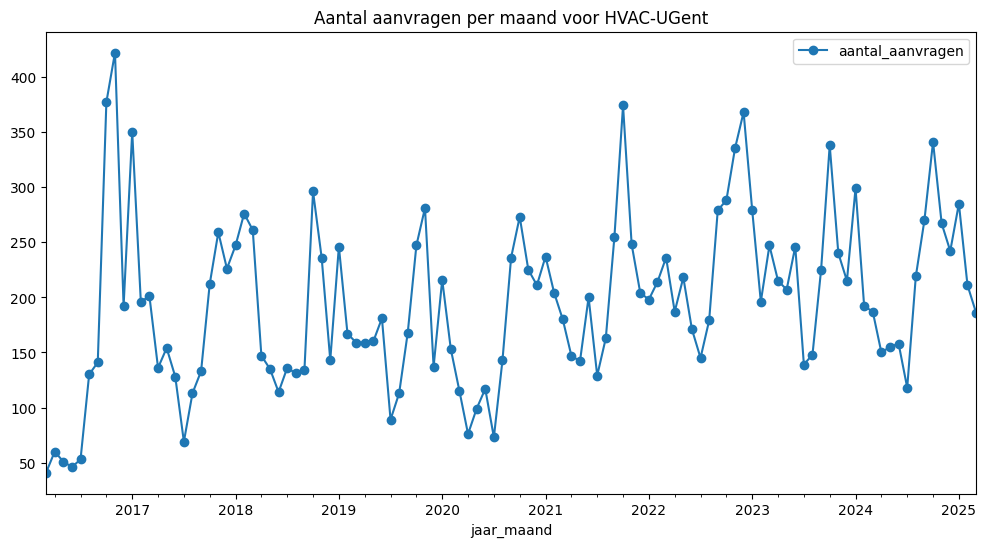

In [7]:
ha_pm.plot(title='Aantal aanvragen per maand voor HVAC-UGent', marker='o', figsize=(12, 6))

### 🤔 Interludium: Verken de data

Neem even de tijd om de grafiek te bestuderen en beantwoord volgende vragen:

#### Vragen ter reflectie:

1. **Wat is de trend?**  
   Zie je een algemene stijging of daling in het aantal herstelaanvragen over de jaren heen?

2. **Hoe zou je de exacte trend berekenen?**  
   Welke methode zou je kunnen gebruiken om een trendlijn te bepalen? (Denk aan lineaire regressie, voortschrijdend gemiddelde, ...)

3. **Wat is de seizoenscomponent?**  
   Zie je een terugkerend patroon binnen een jaar? In welke maanden zijn er meer of minder aanvragen?

4. **Voorspellingsoefening:**  
   - Probeer het aantal aanvragen voor **januari 2025** te voorspellen, gebaseerd op de waarde van **december 2024**.
   - Probeer het aantal aanvragen voor **februari 2025** te voorspellen, gebaseerd op de waarde van **december 2024**.
   - Probeer het aantal aanvragen voor **maart 2025** te voorspellen, gebaseerd op de waarde van **december 2024**.

> **💡 Tip**: Bij het maken van voorspellingen moet je rekening houden met zowel de trend als het seizoenspatroon. Hoe beïnvloedt dit je voorspelling?


### Tijdreeksmodellen

In de onderstaande grafiek proberen we waargenomen waarden te modelleren met een constante functie $X_t = b + \varepsilon_t$ (waarbij $\varepsilon_t$ een willekeurige ruis is met constante variantie). Als schatting voor $b$ nemen we het gemiddelde van de eerste waarnemingen. We kunnen in principe ons eigen oordeel gebruiken om te kiezen hoeveel waarnemingen we nemen.

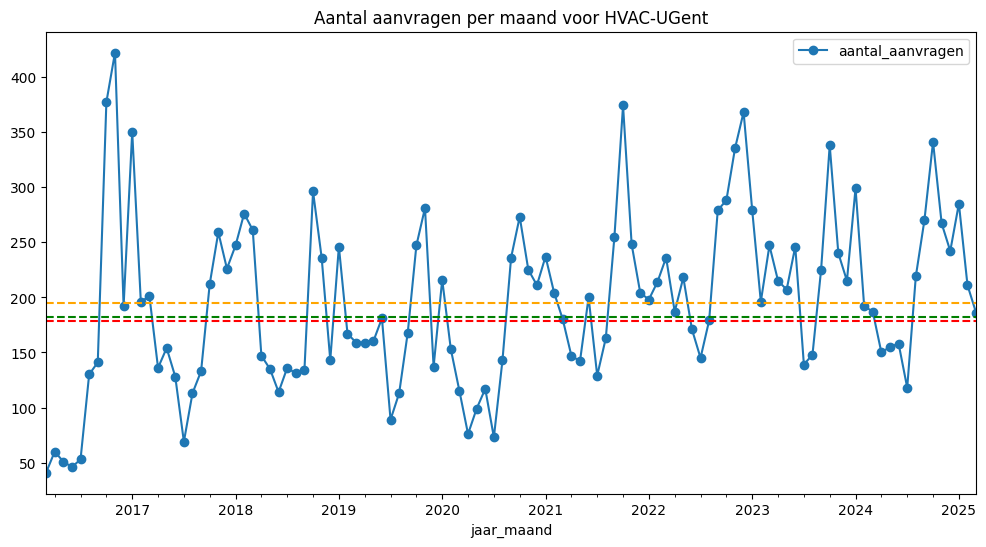

In [10]:
# Best Estimates 70, 80, alle observaties
b_est_70 = ha_pm['aantal_aanvragen'].head(70).mean()
b_est_80 = ha_pm['aantal_aanvragen'].head(80).mean()
b_est_all = ha_pm['aantal_aanvragen'].mean()

ha_pm.plot(title='Aantal aanvragen per maand voor HVAC-UGent', marker='o', figsize=(12, 6))
plt.axhline(b_est_70, color='red', linestyle='--', label='Constante schatting (70 eerste maanden)')
plt.axhline(b_est_80, color='green', linestyle='--', label='Constante schatting (80 eerste maanden)')
plt.axhline(b_est_all, color='orange', linestyle='--', label='Constante schatting (alle maanden)')

Als we deze waarden willen modelleren met een lineaire functie $X_t = b_0 + b_1 t + \varepsilon_t$, kunnen we een techniek gebruiken die we eigenlijk al in een andere context hebben gebruikt: lineaire regressie. Een lineaire trend betekent dat de tijdreeksvariabele met een constant bedrag verandert in elke tijdsperiode.

De interpretatie van $b_1$ is dat het de verwachte verandering in de reeks van de ene periode naar de volgende voorstelt. Als $b_1$ positief is, is de trend opwaarts; als $b_1$ negatief is, is de trend neerwaarts.
De constante term $b_0$ is minder belangrijk. Deze vertegenwoordigt letterlijk de verwachte waarde van de reeks op tijdstip t = 0.

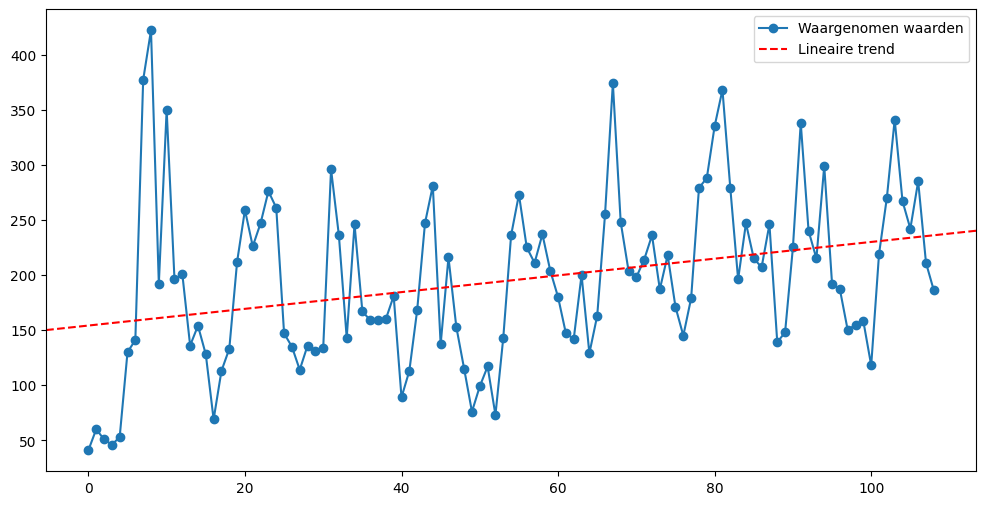

In [15]:
ha_lm = LinearRegression().fit(np.arange(0, len(ha_pm)).reshape(-1, 1), ha_pm['aantal_aanvragen'])

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ha_pm)), ha_pm['aantal_aanvragen'], marker='o', label='Waargenomen waarden')
plt.axline((0, ha_lm.intercept_), slope=ha_lm.coef_[0], color='red', linestyle='--', label='Lineaire trend')
plt.legend()
plt.show();

We kunnen ook verder gaan en een regressiemodel opstellen volgens een vergladde (smoothed) curve.

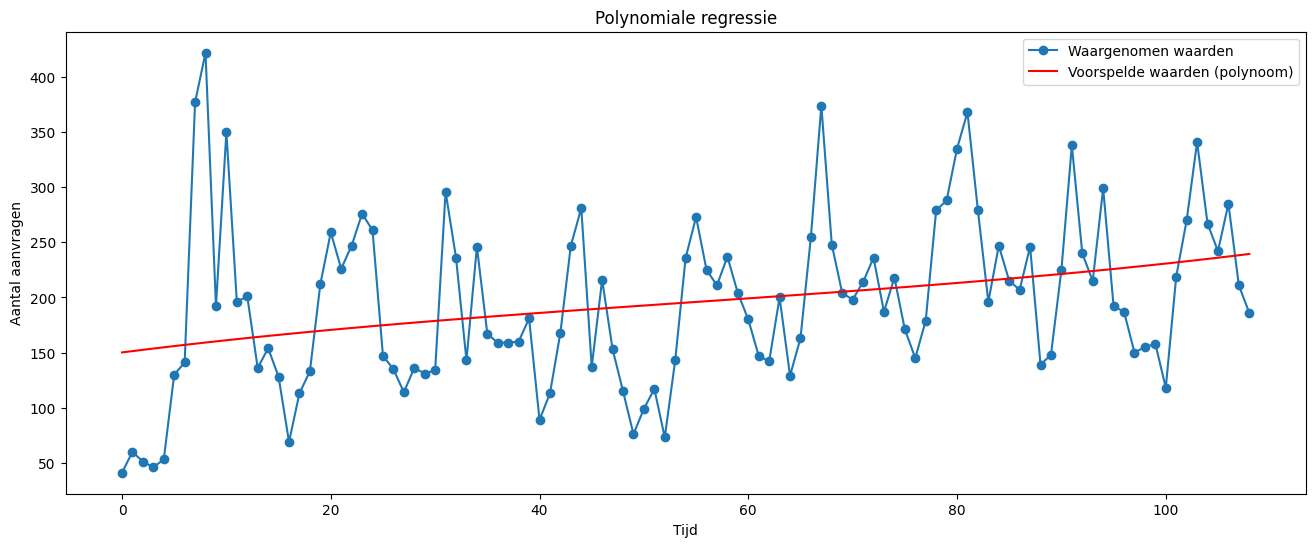

Coefficients: [ 0.00000000e+00  1.19698304e+00 -9.95249811e-03  6.04316905e-05]
Intercept: 150.13044090800707
Equation: X_t = 150.13 + 1.20t + -0.0100t^2 + ε_t


In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Creeer X data
X = np.arange(0, len(ha_pm)).reshape(-1, 1)

# Transformeer de features om de kwadraatsfunctie mogelijk te maken
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X) # Dit voegt een kolom met kwadraten toe

# Pas lineaire regressie toe op de getransformeerde features
poly_lm = LinearRegression().fit(X_poly, ha_pm['aantal_aanvragen'])

## Maak voorspellingen voor de gehele dataset
X_plot = np.arange(0, len(ha_pm)).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_pred = poly_lm.predict(X_plot_poly)

# Plot de resultaten
plt.figure(figsize=(16, 6))
plt.plot(np.arange(0, len(ha_pm)), ha_pm['aantal_aanvragen'], marker='o', label='Waargenomen waarden')
plt.plot(np.arange(0, len(ha_pm)), y_pred, color='red', label='Voorspelde waarden (polynoom)')
plt.title('Polynomiale regressie')
plt.xlabel('Tijd')
plt.ylabel('Aantal aanvragen')
plt.legend()
plt.show()

# Print de coefficienten
print("Coefficients:", poly_lm.coef_)
print("Intercept:", poly_lm.intercept_)
print(f'Equation: X_t = {poly_lm.intercept_:.2f} + {poly_lm.coef_[1]:.2f}t + {poly_lm.coef_[2]:.4f}t^2 + ε_t')

We kunnen ook de `regplot()` functie van **Seaborn** gebruiken.

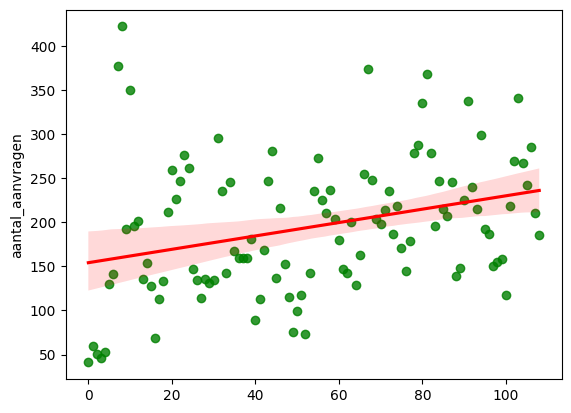

In [20]:
sns.regplot(x=np.arange(0, len(ha_pm)), 
            y=ha_pm['aantal_aanvragen'], 
            line_kws={'color': 'red'},
            scatter_kws={'color':'g'});

Zien bovenstaande regressies er handig uit? Misschien wordt het bruikbaarder wanneer we extra features toevoegen?

## Voortschrijdend gemiddelde

We hebben in feite een methode nodig die de laatste waarnemingen in rekening brengt, maar oudere waarnemingen na een bepaalde tijd vergeet. Oudere waarnemingen zijn mogelijk niet langer representatief voor de huidige situatie. Voortschrijdende gemiddelden zijn dergelijke methoden.

### Eenvoudig voortschrijdend gemiddelde

$$SMA(t) = \frac{1}{m} \sum_{i=k}^{t} x_i$$

Waarbij $m$ de tijdsspanne is (het aantal waarnemingen dat in rekening wordt gebracht) en $k$ = t - m + 1.

Stel dat de gegevens maandelijks zijn en je kiest een tijdsspanne van zes maanden.
Dan is de voorspelling voor de volgende maand het gemiddelde van de waarden van de afgelopen zes maanden. Je neemt bijvoorbeeld het gemiddelde van januari tot juni om juli te voorspellen, je neemt het gemiddelde van februari tot juli om augustus te voorspellen, enzovoort. Deze procedure is de reden voor de term voortschrijdende gemiddelden.
De rol van de tijdsspanne is belangrijk. Als de spanwijdte groot is—bijvoorbeeld 12 maanden—dan gaan er veel waarnemingen in elk gemiddelde en hebben extreme waarden relatief weinig effect op de voorspellingen. De resulterende reeks voorspellingen zal veel gladder zijn dan de oorspronkelijke reeks.  
Daarentegen, als de spanwijdte klein is—bijvoorbeeld drie maanden—dan hebben extreme waarnemingen een groter effect op de voorspellingen, en zal de voorspellingsreeks veel minder glad zijn.

De Pandas `Series` klasse heeft een methode [`rolling()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html) voor "rolling window" berekeningen, die perfect geschikt is voor wat we hier willen doen.

We roepen de methode `rolling(m)` aan met de gewenste tijdsspanne en berekenen vervolgens het `mean()`:

In [21]:
ha_pm['SMA_3'] = ha_pm['aantal_aanvragen'].rolling(3).mean()
ha_pm['SMA_6'] = ha_pm['aantal_aanvragen'].rolling(6).mean()
ha_pm['SMA_12'] = ha_pm['aantal_aanvragen'].rolling(12).mean()
ha_pm

,aantal_aanvragen,SMA_3,SMA_6,SMA_12
jaar_maand,,,,
2016-03-01,41,NaN,NaN,NaN
2016-04-01,60,NaN,NaN,NaN
2016-05-01,51,50.666667,NaN,NaN
2016-06-01,46,52.333333,NaN,NaN
2016-07-01,53,50.000000,NaN,NaN
...,...,...,...,...
2024-11-01,267,292.666667,228.833333,214.250000
2024-12-01,242,283.333333,242.833333,216.500000
2025-01-01,285,264.666667,270.666667,215.333333


Je zult merken dat de eerste datapunten in de SMA-kolommen leeg zijn (`NaN`). Op die tijdstippen zijn er nog niet genoeg waarnemingen uit het verleden om het gemiddelde te berekenen. Hoe groter het tijdsvenster, hoe meer lege datapunten er zijn.

Als je lege cellen wilt vermijden, kun je de parameter `min_periods=1` toevoegen aan de methode-aanroep van `rolling()`. In dat geval wordt het gemiddelde berekend met elke beschikbare waarneming uit het verleden.

<Axes: xlabel='jaar_maand'>

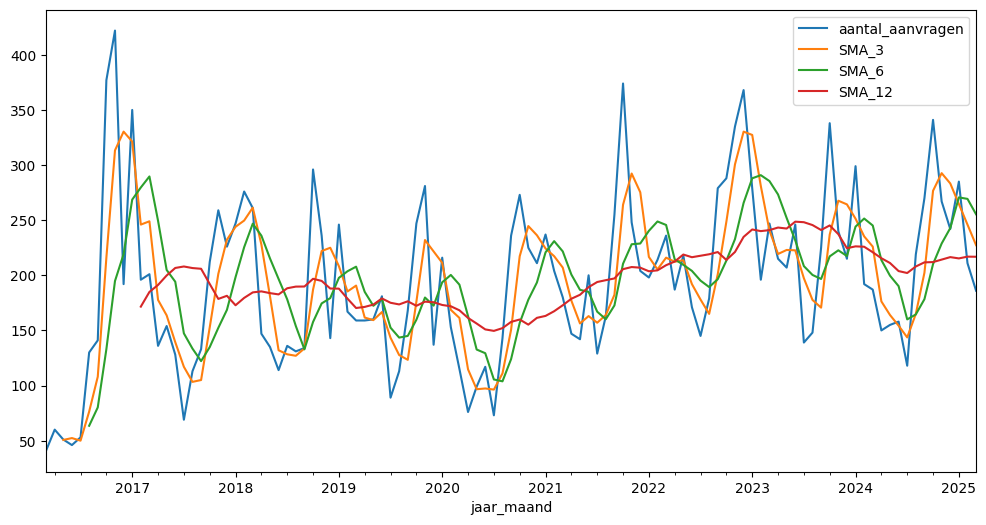

In [22]:
ha_pm.plot(
    y=['aantal_aanvragen', 'SMA_3', 'SMA_6', 'SMA_12'],
    figsize=(12, 6)
)

Zoals je zult merken, zullen SMA's met een kort venster nog steeds de schommelingen in de waarnemingen volgen, terwijl die met een langer venster meer "stabiel" zijn en veerkrachtiger tegen kortetermijnschommelingen.

Er zijn twee mogelijke kritiekpunten op de methode van voortschrijdende gemiddelden. Ten eerste kent het gelijk gewicht toe aan elke waarde in een typisch voortschrijdend gemiddelde. Maar men kan argumenteren dat als de voorspelling van de volgende maand gebaseerd moet zijn op de waarnemingen van de afgelopen 12 maanden, er meer gewicht moet worden gelegd op de recentere waarnemingen. Het tweede kritiekpunt is dat de methode van voortschrijdende gemiddelden veel gegevensopslag vereist.

**Exponentiële vergladding** is een methode die beide kritiekpunten aanpakt. Ze baseert haar voorspellingen op een gewogen gemiddelde van eerdere waarnemingen, met meer gewicht op de recentere waarnemingen, en vereist zeer weinig gegevensopslag. Bovendien is het niet moeilijk voor de meeste zakenmensen om te begrijpen, althans conceptueel. Daarom wordt deze methode veel gebruikt in de zakenwereld, vooral wanneer frequente en automatische voorspellingen van veel items vereist zijn.
Er zijn veel varianten van exponentiële vergladding.
**Enkele exponentiële vergladding** is geschikt voor een reeks zonder uitgesproken trend of seizoensgebondenheid. **Holt's methode** is geschikt voor een reeks met trend maar zonder seizoensgebondenheid.
**Winters' methode** is geschikt voor een reeks met seizoensgebondenheid (en mogelijk trend).

### Exponentieel voortschrijdend gemiddelde (EMA)

Ook wel *Enkele exponentiële vergladding* (SES) genoemd.

$X_t = \alpha x_t + (1 - \alpha) X_{t-1}$

$F_{t+m} = X_t$

* $\alpha$ is de vergladdingsconstante en is een getal tussen 0 en 1
* $X_t$ is het _niveau_ van de reeks op tijdstip _t_. Deze waarde is niet waarneembaar maar kan alleen worden geschat. In wezen is het een schatting van waar de reeks zou zijn op tijdstip _t_ als er geen willekeurige ruis was.
* $F_{t+m}$ is de voorspelling op tijdstip m

De eerste vergelijking toont hoe de schatting van het niveau wordt bijgewerkt.
Het is een gewogen gemiddelde van de huidige waarneming, $x_t$, en het vorige niveau, $X_{t-1}$, met respectievelijke gewichten $\alpha$ en 1 − $\alpha$.   
De tweede vergelijking toont hoe voorspellingen worden gemaakt. Ze zegt dat de m-perioden-vooruit voorspelling, $F_{t+m}$, gemaakt van $X_t$ in periode $m$ het meest recent geschatte niveau is, $X_t$. Dit is hetzelfde voor elke waarde van m >= 1.
Het idee is dat je bij enkele exponentiële vergladding gelooft dat de reeks nergens echt naartoe gaat. Dus zodra je schat waar de reeks zou moeten zijn in periode t (als het niet voor willekeurige ruis was), gebruik je dit als de voorspelling voor elke toekomstige periode.

Pandas heeft een methode [`ewm()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) die kan worden gebruikt om het exponentiële voortschrijdend gemiddelde te berekenen.

<Axes: xlabel='jaar_maand'>

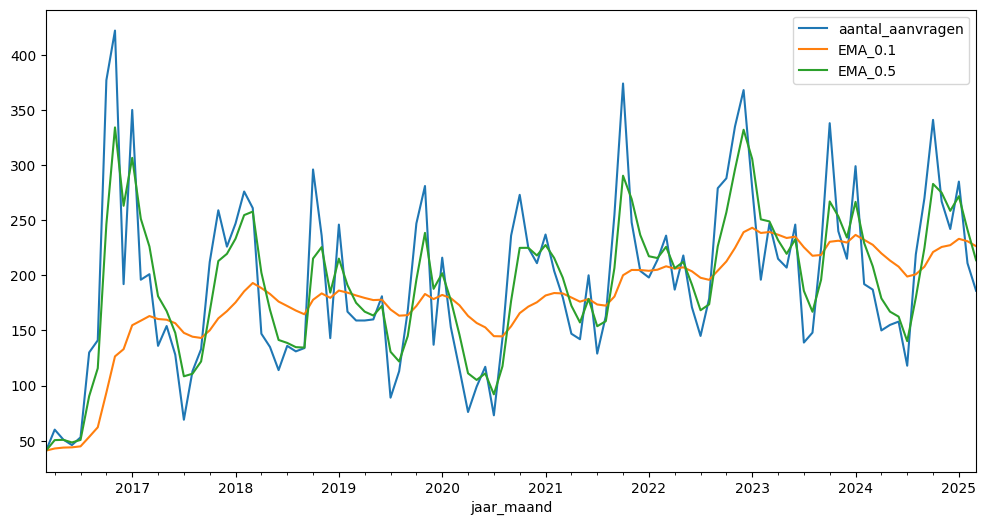

In [23]:
ha_pm['EMA_0.1'] = ha_pm['aantal_aanvragen'].ewm(alpha=0.1, adjust=False).mean()
ha_pm['EMA_0.5'] = ha_pm['aantal_aanvragen'].ewm(alpha=0.5, adjust=False).mean()

ha_pm.plot(y=['aantal_aanvragen', 'EMA_0.1', 'EMA_0.5'], figsize=(12, 6))

Speel met de waarden van alpha. Wat is het effect als alpha klein is (dicht bij 0) of groot (dicht bij 1)?

Een manier om het effect van α te zien is door recursief te substitueren in de vergelijking voor $X_t$.
Door wat algebra uit te voeren, kun je verifiëren dat $X_t$ voldoet aan de volgende vergelijking, waarbij de som teruggaat tot de eerste waarneming op tijdstip = 1.

$X_t = \alpha x_{t} + \alpha (1 - \alpha) x_{t-1} + \alpha (1 - \alpha)^2 x_{t-2} + \alpha (1 - \alpha)^3 x_{t-3} + ...$

Deze vergelijking toont hoe de exponentieel afgevlakte voorspelling een gewogen gemiddelde is van eerdere waarnemingen. Bovendien, omdat 1 − $\alpha$ kleiner is dan 1, nemen de gewichten op de x'en af vanaf tijdstip t naar achteren.
Als $\alpha$ dicht bij 0 ligt, dan ligt 1 − $\alpha$ dicht bij 1 en nemen de gewichten zeer langzaam af. Met andere woorden, waarnemingen uit het verre verleden blijven een grote invloed hebben op de volgende voorspelling. Dit betekent dat de grafiek van de voorspellingen relatief glad zal zijn, net zoals bij een grote span in de voortschrijdend gemiddelde methode. Maar als $\alpha$ dicht bij 1 ligt, nemen de gewichten snel af, en hebben alleen zeer recente waarnemingen veel invloed op de volgende voorspelling. In dit geval reageren voorspellingen snel op plotselinge veranderingen in de reeks.

Helaas staat de `ewm()` methode ons niet toe om dubbele of driedubbele exponentiële afvlakking te doen. Statsmodels heeft wel de benodigde klassen. Voor Enkele Exponentiële Afvlakking kunnen we de [`SimpleExpSmoothing`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing) klasse instantiëren en vervolgens de [`fit()`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit) methode aanroepen. De parameter $\alpha$ kan worden ingesteld met het argument `smoothing_level`.

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Train het model
data_ses = SimpleExpSmoothing(ha_pm['aantal_aanvragen']).fit(smoothing_level=0.1, optimized=False)

# Voeg de waarden toe aan het dataframe
ha_pm['SES_0.1'] = data_ses.level
ha_pm.head(20)

,aantal_aanvragen,SMA_3,SMA_6,SMA_12,EMA_0.1,EMA_0.5,SES_0.1
jaar_maand,,,,,,,
2016-03-01,41,NaN,NaN,NaN,41.000000,41.000000,41.000000
2016-04-01,60,NaN,NaN,NaN,42.900000,50.500000,42.900000
2016-05-01,51,50.666667,NaN,NaN,43.710000,50.750000,43.710000
2016-06-01,46,52.333333,NaN,NaN,43.939000,48.375000,43.939000
2016-07-01,53,50.000000,NaN,NaN,44.845100,50.687500,44.845100
2016-08-01,130,76.333333,63.500000,NaN,53.360590,90.343750,53.360590
2016-09-01,141,108.000000,80.166667,NaN,62.124531,115.671875,62.124531
2016-10-01,377,216.000000,133.000000,NaN,93.612078,246.335938,93.612078
2016-11-01,422,313.333333,194.833333,NaN,126.450870,334.167969,126.450870


<Axes: xlabel='jaar_maand'>

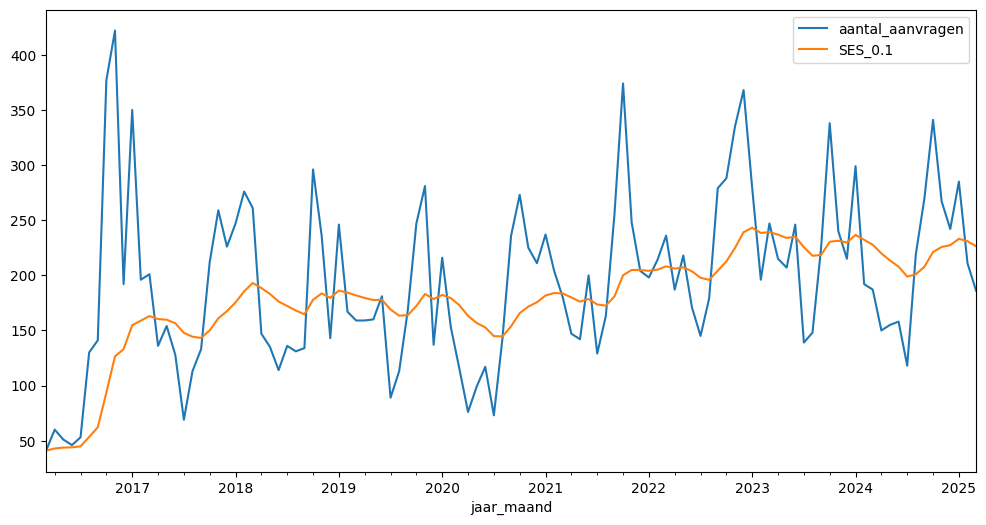

In [12]:
ha_pm.plot(y=['aantal_aanvragen', 'SES_0.1'], figsize=(12, 6))

Dit model laat ons ook to om voorspellingen te maken.

<Axes: xlabel='jaar_maand'>

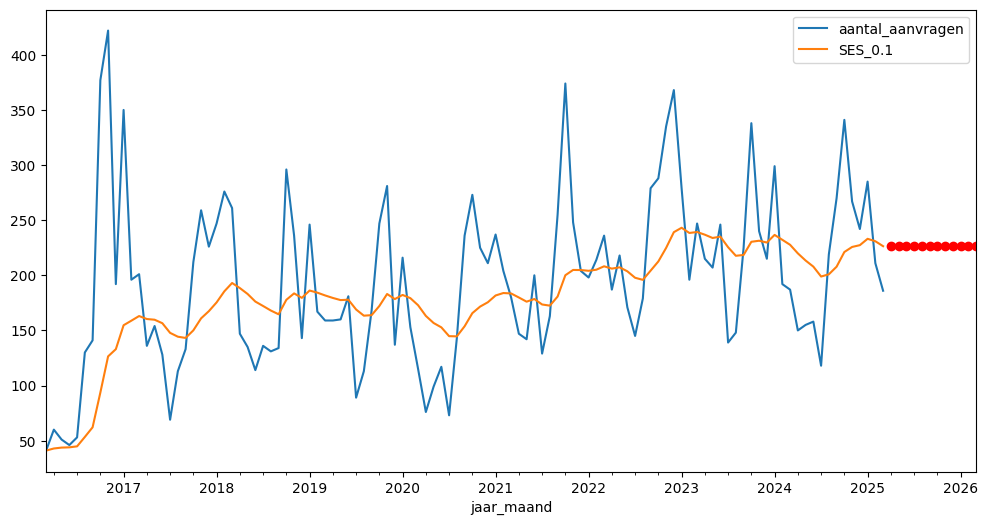

In [13]:
data_ses_fcast = data_ses.forecast(12)

ha_pm.plot(y=['aantal_aanvragen', 'SES_0.1'], figsize=(12, 6))
data_ses_fcast.plot(marker='o', color='red', label='Voorspelling SES 0.1')

Als we terugkijken naar de formules van Enkele Exponentiële Afvlakking, is de voorspelde waarde voor elke waarde van m >= 1 het _niveau_ van de reeks op tijdstip _t_:

$X_t = \alpha x_t + (1 - \alpha) X_{t-1}$

$F_{t+m} = X_t$

Als we naar de grafiek kijken, lijkt dit correct, maar laten we controleren of dit daadwerkelijk het geval is door gebruik te maken van de data die uit het model komt.
Eerst halen we de niveau's $X_t$ van het model op.

In [14]:
data_ses.level

jaar_maand
2016-03-01     41.000000
2016-04-01     42.900000
2016-05-01     43.710000
2016-06-01     43.939000
2016-07-01     44.845100
                 ...    
2024-11-01    225.712853
2024-12-01    227.341568
2025-01-01    233.107411
2025-02-01    230.896670
2025-03-01    226.407003
Freq: MS, Length: 109, dtype: float64

Print nu de voorspelde waarden:

In [15]:
data_ses_fcast.values

array([226.40700297, 226.40700297, 226.40700297, 226.40700297,
       226.40700297, 226.40700297, 226.40700297, 226.40700297,
       226.40700297, 226.40700297, 226.40700297, 226.40700297])

We kunnen zien dat de laatste waarde van data_ses.level inderdaad dezelfde is als alle voorspelde waarden voor m >= 1.

Wanneer we Enkele Exponentiële Afvlakking gebruiken, gaan we ervan uit dat de onderliggende tijdreeks fluctueert rond een constante waarde. Dit wordt weerspiegeld door de voorspelde waarden (in groen), die altijd hetzelfde zijn.

Soms willen we de werkelijke, waargenomen waarde vergelijken met de waarde die door het model werd voorspeld. In het vorige voorbeeld zagen we dat de waarde $X_t$ op tijdstip $t$ de voorspelling van het model is voor de werkelijke waarde op tijdstip $t + 1$.
Om het verschil te berekenen tussen de werkelijke, waargenomen waarde (op tijdstip $t + 1$) en de voorspelde waarde (op tijdstip $t$), zouden we de kolom data['SES'] één positie naar beneden moeten verschuiven en het verschil maken tussen de kolommen data['aantal_aanvragen'] en data['SES']. Dit lijkt nogal omslachtig. Gelukkig is `.fittedvalues` er om te helpen: het bevat de waarde die door het model wordt voorspeld op tijdstip $t$.

In [16]:
ha_pm['SES_predicted_values'] = data_ses.fittedvalues
ha_pm.tail()

,aantal_aanvragen,SMA_3,SMA_6,SMA_12,EMA_0.1,EMA_0.5,SES_0.1,SES_predicted_values
jaar_maand,,,,,,,,
2024-11-01,267,292.666667,228.833333,214.250000,225.712853,274.953733,225.712853,221.125392
2024-12-01,242,283.333333,242.833333,216.500000,227.341568,258.476867,227.341568,225.712853
2025-01-01,285,264.666667,270.666667,215.333333,233.107411,271.738433,233.107411,227.341568
2025-02-01,211,246.000000,269.333333,216.916667,230.896670,241.369217,230.896670,233.107411
2025-03-01,186,227.333333,255.333333,216.833333,226.407003,213.684608,226.407003,230.896670


Als laatste kunnen we ook de automatisch berekende parameters van het model ophalen: gebruik `.params_formatted` om een dataframe te verkrijgen met alle parameters:

In [17]:
data_ses.params_formatted

,name,param,optimized
smoothing_level,alpha,0.1,False
initial_level,l.0,41.0,False


### Dubbele exponentiële afvlakking

Het enkele exponentiële afvlakkingsmodel werkt over het algemeen goed als er geen duidelijke trend in de reeks aanwezig is. Maar als er wel een trend is, blijft deze methode er consequent achter. Als de reeks bijvoorbeeld constant stijgt, zullen de voorspellingen van enkele exponentiële afvlakking consequent te laag zijn. Holt's methode verhelpt dit door de trend expliciet te behandelen. Naast het niveau van de reeks, $X_{t}$, bevat Holt's methode een trendterm, $b_{t}$, en een bijbehorende afvlakkingsconstante $\beta$. De interpretatie van $X_{t}$ is exact dezelfde als voorheen. De interpretatie van $b_{t}$ is dat het een schatting vertegenwoordigt van de verandering in de reeks van de ene periode naar de volgende.

Dus als we vermoeden dat er een langetermijn (stijgende of dalende) trend in de tijdreeks zit, kunnen we Holt's methode gebruiken, ook wel Dubbele Exponentiële Afvlakking (DES) genoemd.

$X_{t} = \alpha x_{t} + (1-\alpha)(X_{t-1} + b_{t-1})$

$b_{t} = \beta(X_{t}-X_{t-1}) + (1-\beta)b_{t-1}$

$F_{t+m} = X_t + mb_t$

met afvlakkingsparameters $0 < \alpha < 1$ en $0 < \beta < 1$. $b_t$ is een schatting voor de trend op tijdstip $t$ en kan ook worden geïnterpreteerd als de helling van een regressielijn.

De eerste vergelijking zegt dat het bijgewerkte niveau een gewogen gemiddelde is van de huidige waarneming en het vorige niveau plus de geschatte verandering.
De tweede vergelijking zegt dat de bijgewerkte trend een gewogen gemiddelde is van het verschil tussen twee opeenvolgende niveaus en de vorige trend.
De derde vergelijking zegt dat de m-perioden-vooruit voorspelling gemaakt in periode t het geschatte niveau is plus m keer de geschatte verandering per periode.

Alles wat gezegd werd over $\alpha$ voor enkele exponentiële afvlakking geldt voor zowel $\alpha$ als $\beta$ in Holt's model. De nieuwe afvlakkingsconstante $\beta$ regelt hoe snel de methode reageert op waargenomen veranderingen in de trend. Als $\beta$ klein is, reageert de methode langzaam. Als het groot is, reageert de methode sneller.

In Python kun je de klasse [`Holt`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.Holt.html#statsmodels.tsa.holtwinters.Holt) instantiëren en de [`fit()`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.Holt.fit.html#statsmodels.tsa.holtwinters.Holt.fit) methode aanroepen. De afvlakkingsparameters $\alpha$ en $\beta$ kunnen worden ingesteld met de argumenten `smoothing_level` en `smoothing_trend`. Als je deze niet specificeert, worden geschikte waarden berekend met behulp van een vuistregel.

In [18]:
from statsmodels.tsa.api import Holt

data_des = Holt(ha_pm['aantal_aanvragen']).fit(
    smoothing_level=0.1,
    smoothing_slope=0.2,
    optimized=True
)

ha_pm['DES'] = data_des.level
ha_pm.tail()

C:\Users\jakdvree\AppData\Local\Temp\ipykernel_13396\2660812246.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  data_des = Holt(ha_pm['aantal_aanvragen']).fit(
c:\Users\jakdvree\Documents\vscode\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,aantal_aanvragen,SMA_3,SMA_6,SMA_12,EMA_0.1,EMA_0.5,SES_0.1,SES_predicted_values,DES
jaar_maand,,,,,,,,,
2024-11-01,267,292.666667,228.833333,214.250000,225.712853,274.953733,225.712853,221.125392,201.100797
2024-12-01,242,283.333333,242.833333,216.500000,227.341568,258.476867,227.341568,225.712853,204.958248
2025-01-01,285,264.666667,270.666667,215.333333,233.107411,271.738433,233.107411,227.341568,213.470790
2025-02-01,211,246.000000,269.333333,216.916667,230.896670,241.369217,230.896670,233.107411,215.162661
2025-03-01,186,227.333333,255.333333,216.833333,226.407003,213.684608,226.407003,230.896670,214.102092


<Axes: xlabel='jaar_maand'>

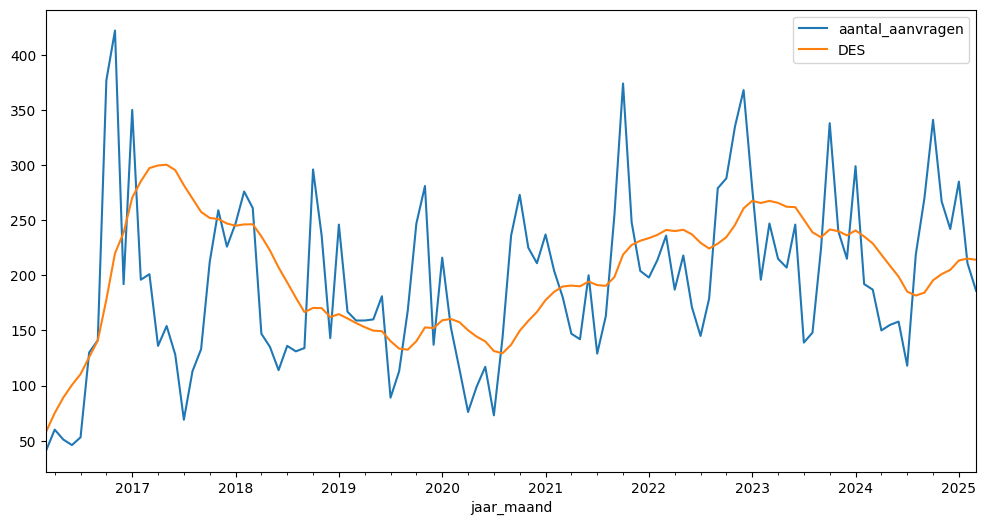

In [20]:
ha_pm.plot(y=['aantal_aanvragen', 'DES'], figsize=(12, 6))

We kunnen de parameters van het model bekijken via `.params_formatted` (smoothing parameters, initial estimate of constant term and trend).

In [21]:
data_des.params_formatted

,name,param,optimized
smoothing_level,alpha,0.1,False
smoothing_trend,beta,0.2,False
initial_level,l.0,41.0,False
initial_trend,b.0,19.0,False


Laten we nu ons nieuw model gebruiken om een voorspelling te maken.

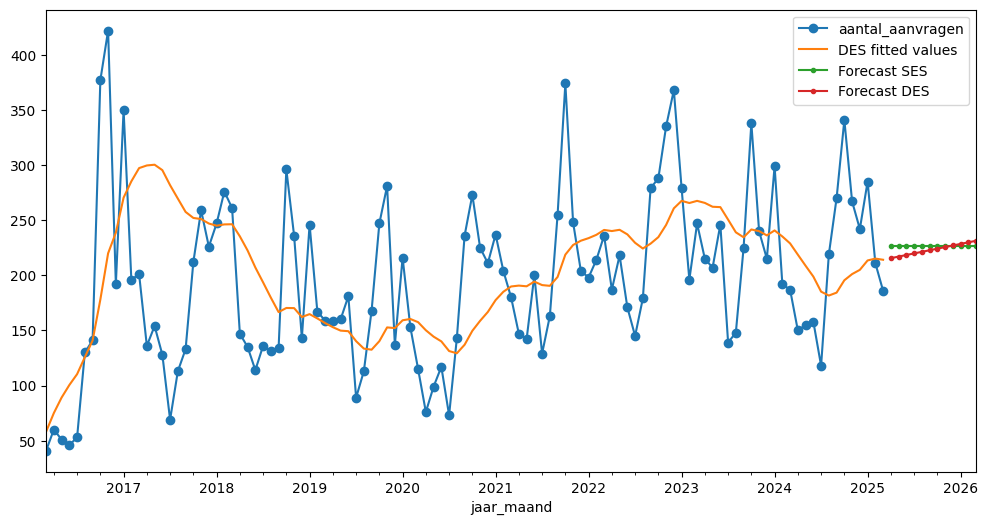

In [22]:
data_des_fcast = data_des.forecast(12)

# Plot de resultaten
ha_pm['aantal_aanvragen'].plot(marker='o', legend=True)
ha_pm['DES'].plot(legend=True, label='DES fitted values', figsize=(12, 6))
data_ses_fcast.plot(marker='.', legend=True, label='Forecast SES');
data_des_fcast.plot(marker='.', legend=True, label='Forecast DES');

Zoals we nu kunnen zien stijgen de voorspellingen nu wel:

In [23]:
data_des_fcast

2025-04-01    215.539487
2025-05-01    216.976882
2025-06-01    218.414277
2025-07-01    219.851672
2025-08-01    221.289067
2025-09-01    222.726462
2025-10-01    224.163856
2025-11-01    225.601251
2025-12-01    227.038646
2026-01-01    228.476041
2026-02-01    229.913436
2026-03-01    231.350831
Freq: MS, dtype: float64

De formule voor het voorspellen van waarden:

$F_{t+m} = X_t + mb_t$

Bekijk de waarden van het niveau $X_t$ en de trend $b_t$ om de voorspelde waarden te begrijpen, zoals deze hier eerder zijn afgedrukt.
*   Verklaar de voorspelde waarde van 2023-01-01
*   Verklaar de voorspelde waarde van 2023-02-01
*   ...

In [24]:
data_des.level

jaar_maand
2016-03-01     58.100000
2016-04-01     75.048000
2016-05-01     89.100240
2016-06-01    100.485251
2016-07-01    110.342056
                 ...    
2024-11-01    201.100797
2024-12-01    204.958248
2025-01-01    213.470790
2025-02-01    215.162661
2025-03-01    214.102092
Freq: MS, Length: 109, dtype: float64

In [25]:
data_des.trend

jaar_maand
2016-03-01    18.620000
2016-04-01    18.285600
2016-05-01    17.438928
2016-06-01    16.228145
2016-07-01    14.953877
                ...    
2024-11-01    -0.258299
2024-12-01     0.564851
2025-01-01     2.154389
2025-02-01     2.061886
2025-03-01     1.437395
Freq: MS, Length: 109, dtype: float64

We kunnen opnieuw `.fittedvalues` gebruiken om de voorspelde waarden te vergelijken op tijd $t$ met de geobserveerde waarden op tijd $t$.

In [26]:
ha_pm['DES_predicted_next_month'] = data_des.level + data_des.trend # Voorspelde waarde voor volgende maand => m = 1
ha_pm['DES_fittedvalues'] = data_des.fittedvalues
ha_pm.tail()

,aantal_aanvragen,SMA_3,SMA_6,SMA_12,EMA_0.1,EMA_0.5,SES_0.1,SES_predicted_values,DES,DES_predicted_next_month,DES_fittedvalues
jaar_maand,,,,,,,,,,,
2024-11-01,267,292.666667,228.833333,214.250000,225.712853,274.953733,225.712853,221.125392,201.100797,200.842498,193.778663
2024-12-01,242,283.333333,242.833333,216.500000,227.341568,258.476867,227.341568,225.712853,204.958248,205.523100,200.842498
2025-01-01,285,264.666667,270.666667,215.333333,233.107411,271.738433,233.107411,227.341568,213.470790,215.625179,205.523100
2025-02-01,211,246.000000,269.333333,216.916667,230.896670,241.369217,230.896670,233.107411,215.162661,217.224547,215.625179
2025-03-01,186,227.333333,255.333333,216.833333,226.407003,213.684608,226.407003,230.896670,214.102092,215.539487,217.224547


### Drievoudige Exponentiële Afvlakking

Zoals vermeld in de introductie, is seizoenaliteit het consistente verschil van maand tot maand (of van kwartaal tot kwartaal) dat elk jaar voorkomt. (Het kan ook het dag-tot-dag verschil zijn dat elke week voorkomt.) Bijvoorbeeld, er is seizoenaliteit in speelgoedverkoop, met een enorme piek in de maanden voorafgaand aan Kerstmis.

Hoe kun je zien of er seizoenaliteit in een tijdreeks zit? De eenvoudigste manier is om te controleren of een grafiek van de tijdreeks een regelmatig patroon van stijgingen en/of dalingen in bepaalde maanden of kwartalen heeft.

In een **additief seizoensmodel** wordt een geschikte seizoensindex toegevoegd aan een basisvoorspelling.

In een **multiplicatief seizoensmodel** wordt een basisvoorspelling vermenigvuldigd met een geschikte seizoensindex.

Om seizoenaliteit te behandelen, kan men (onder andere) het exponentiële afvlakkingsmodel van Holt-Winters gebruiken. Het lijkt sterk op het model van Holt—het heeft opnieuw niveau- en trendtermen met bijbehorende afvlakkingsconstanten $\alpha$ en $\beta$—maar het heeft ook seizoensindexen en een bijbehorende afvlakkingsconstante $\gamma$ (gamma). Deze nieuwe afvlakkingsconstante regelt hoe snel de methode reageert op waargenomen veranderingen in het seizoenspatroon. Als $\gamma$ klein is, reageert de methode langzaam. Als het groot is, reageert de methode sneller. Net als bij het model van Holt zijn er vergelijkingen voor het bijwerken van de niveau- en trendtermen, en er is één extra vergelijking voor het bijwerken van de seizoensindexen.

Drievoudige Exponentiële Afvlakking (TES), ook wel *Holt-Winter's Methode* genoemd, kan bovendien ook seizoensgebonden terugkerende trends modelleren.

- Niveau afvlakking: $X_{t} = \alpha \frac{x_{t}}{c_{t-L}} + (1-\alpha) (X_{t-1} + b_{t-1})$
- Trend afvlakking: $b_{t} = \beta (X_{t} - X_{t-1}) + (1-\beta)b_{t-1}$
- Seizoens afvlakking: $c_{t} = \gamma \frac{x_{t}}{X_{t}} + (1-\gamma)c_{t-L}$
- Voorspelling voor $m$ tijdseenheden na de laatste waarneming: $F_{t+m} = (X_{t} + m b_{t})c_{t-L+1+(m-1) \mod L}$

In deze formules wordt de volgende aanvullende notatie gebruikt:

- $L$ is de lengte (in aantal tijdseenheden) van de seizoenscyclus. Gebruikelijke waarden zijn 7 voor een wekelijkse cyclus, 4 voor een kwartaalcyclus, 12 voor een maandelijkse cyclus, enz.
- $0 < \gamma < 1$ is de afvlakkingsparameter voor de seizoenstrend (zoals $\alpha$ en $\beta$). Stel deze waarde in de `fit()` methode in met het argument `smoothing_seasonal`.
- $c_t$ zijn schattingen voor de seizoenscorrectiefactoren, één voor elke tijdseenheid $t\mod L$ binnen de seizoenscyclus.

Om te begrijpen hoe de voorspellingsvergelijking werkt, stel dat je gegevens hebt waargenomen tot en met juni en je wilt een voorspelling voor de komende september, dat wil zeggen, een voorspelling drie maanden vooruit. (In dit geval verwijst t naar juni en t + m = t + 3 verwijst naar september.) De methode telt eerst 3 keer de huidige trendterm op bij het huidige niveau. Dit geeft een voorspelling voor september die geschikt zou zijn als er geen seizoenaliteit was. Vervolgens vermenigvuldigt het deze voorspelling met de meest recente schatting van september's seizoensindex (die van de vorige september) om de voorspelling voor september te krijgen.

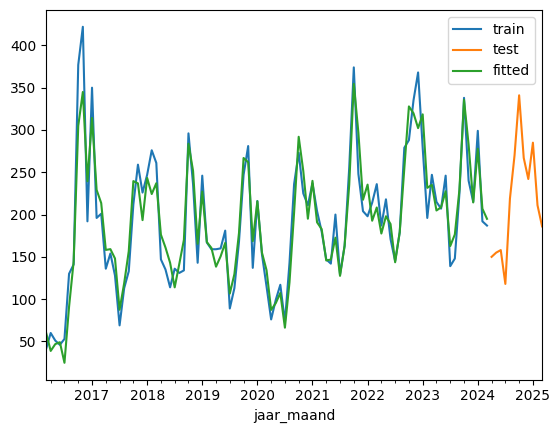

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = ha_pm['aantal_aanvragen'][:-12] # Train op alle data behalve de laatste 12 maanden
test = ha_pm['aantal_aanvragen'][-12:] # Test op de laatste 12 maanden

ha_pm_hw = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12,
    freq='MS'
).fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(ha_pm_hw.level + ha_pm_hw.season).plot(legend=True, label='fitted');


Laten we het model gebruiken om een voorspelling te maken. Toegepast op het aantal herstelaanvragen, berekenen we een voorspelling voor het laatste jaar (test data) op de volgende manier:

Text(0.5, 1.0, 'Holt-Winters Exponentiële Afvlakking met Seizoenality')

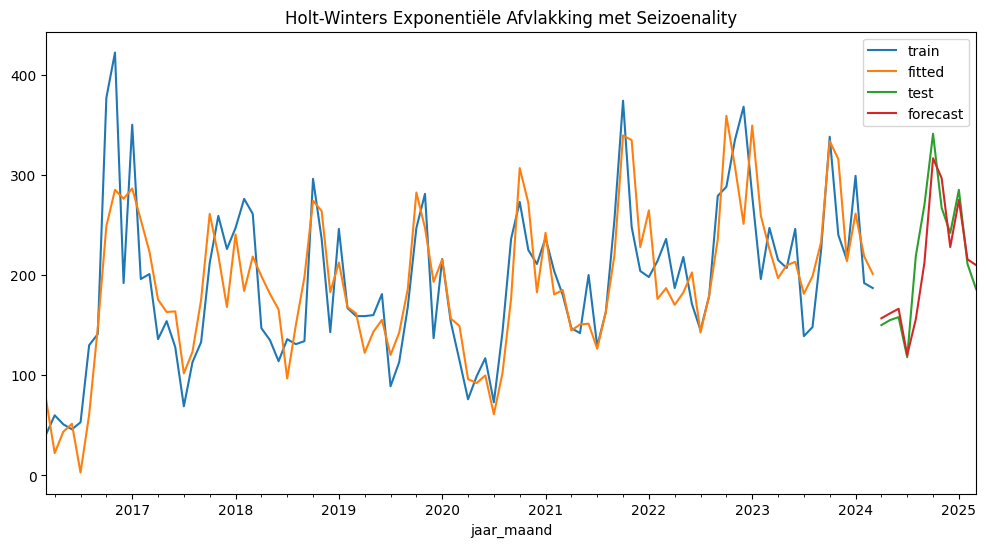

In [30]:
ha_pm_fcast = ha_pm_hw.forecast(12)

train.plot(legend=True, label='train')
ha_pm_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
ha_pm_fcast.plot(legend=True, label='forecast', figsize=(12, 6))

plt.title('Holt-Winters Exponentiële Afvlakking met Seizoenality')

Laten we even inzoomen om de voorspelde periode en vergelijken met de test data:

Text(0.5, 1.0, 'Holt-Winters Exponentiële Afvlakking met Seizoenality - Ingezoomd')

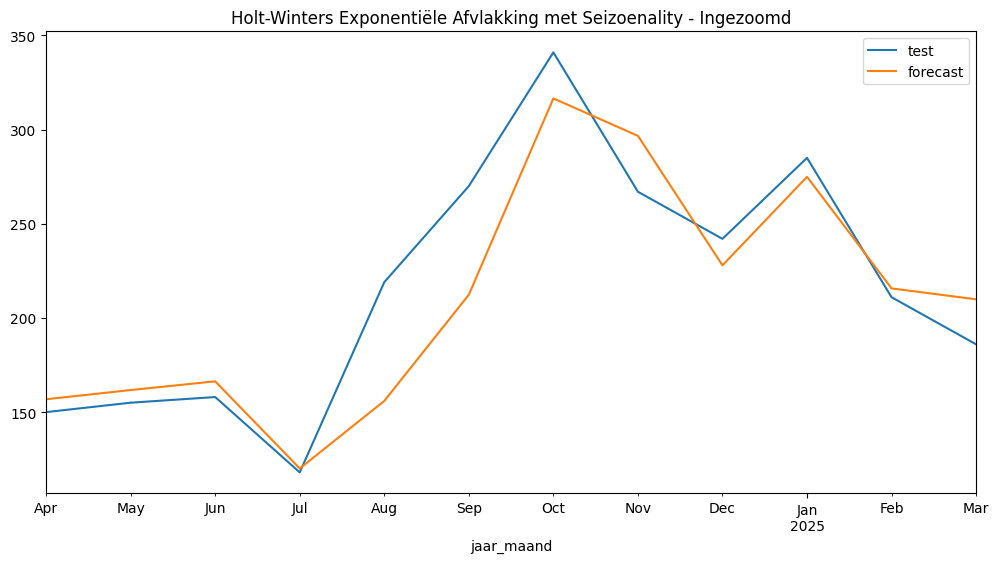

In [31]:
test.plot(legend=True, label='test')
ha_pm_fcast.plot(legend=True, label='forecast', figsize=(12, 6));
plt.title('Holt-Winters Exponentiële Afvlakking met Seizoenality - Ingezoomd')

In [32]:
ha_pm_fcast

2024-04-01    156.826554
2024-05-01    161.715122
2024-06-01    166.337504
2024-07-01    120.078713
2024-08-01    155.946924
2024-09-01    212.316321
2024-10-01    316.560039
2024-11-01    296.678976
2024-12-01    227.923752
2025-01-01    274.934037
2025-02-01    215.687868
2025-03-01    209.891282
Freq: MS, dtype: float64

Opnieuw kunnen we de interne waarden van het model ophalen. Dit zijn de relevante attributen:

- `level` bevat alle niveauschattingen ($X_i$) voor elke tijdseenheid in de trainingsdata
- `trend` bevat alle trendschattingen ($b_i$)
- `season` bevat alle schattingen voor de seizoenscorrectiefactoren ($c_i$)
- `params` (dict-uitvoer) of `params_formatted` (tabel-uitvoer) bevat alle parameters die gebruikt zijn om het model te initialiseren (inclusief automatisch berekende parameters).

In [33]:
ha_pm_hw.params_formatted

,name,param,optimized
smoothing_level,alpha,0.437376,True
smoothing_trend,beta,0.000000,True
smoothing_seasonal,gamma,0.000000,True
initial_level,l.0,89.537544,True
initial_trend,b.0,1.244053,True
initial_seasons.0,s.0,-15.254268,True
initial_seasons.1,s.1,-54.634409,True
initial_seasons.2,s.2,-50.989894,True
initial_seasons.3,s.3,-47.611566,True
initial_seasons.4,s.4,-95.114410,True


Voorspellingen worden gemaakt met behulp van de laatste waarden voor de schattingen van het niveau, de trend en de seizoenscorrectiefactoren. Laten we deze uit het model ophalen:

In [34]:
ha_pm_hw.level

jaar_maand
2016-03-01     75.680175
2016-04-01     93.417753
2016-05-01     97.866935
2016-06-01     96.705674
2016-07-01    119.890551
                 ...    
2023-11-01    206.070702
2023-12-01    207.828621
2024-01-01    225.540197
2024-02-01    215.162900
2024-03-01    210.216910
Freq: MS, Length: 97, dtype: float64

In [35]:
ha_pm_hw.trend

jaar_maand
2016-03-01    1.244053
2016-04-01    1.244053
2016-05-01    1.244053
2016-06-01    1.244053
2016-07-01    1.244053
                ...   
2023-11-01    1.244053
2023-12-01    1.244053
2024-01-01    1.244053
2024-02-01    1.244053
2024-03-01    1.244053
Freq: MS, Length: 97, dtype: float64

In [36]:
ha_pm_hw.season

jaar_maand
2016-03-01   -15.254268
2016-04-01   -54.634409
2016-05-01   -50.989894
2016-06-01   -47.611566
2016-07-01   -95.114410
                ...    
2023-11-01    76.509639
2023-12-01     6.510362
2024-01-01    52.276594
2024-02-01    -8.213628
2024-03-01   -15.254268
Freq: MS, Length: 97, dtype: float64

Het model maakt voorspellingen door:

- De laatste niveauschatting te nemen
- De laatste trendschatting te nemen
- De laatste schatting voor de overeenkomstige seizoenscorrectiefactor te nemen
- De hierboven gegeven voorspellingsformule te berekenen

Laten we dit verifiëren voor de eerste voorspelde waarde, voor 2024-04-01:

In [38]:
print(ha_pm_fcast.iloc[0])

print((ha_pm_hw.level[-1] + ha_pm_hw.trend[-1]) + ha_pm_hw.season[-12])


156.82655402048374
156.82655402048374


C:\Users\jakdvree\AppData\Local\Temp\ipykernel_13396\3631148970.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((ha_pm_hw.level[-1] + ha_pm_hw.trend[-1]) + ha_pm_hw.season[-12])


### Evalueren van de kwaliteit van een model

In het Holt-Winters model zijn er 3 afvlakkingsconstanten: $\alpha$, $\beta$ en $\gamma$. Wat zijn de meest geschikte waarden? Moet $\alpha$ 0.1 zijn, of eerder 0.5? En hoe zit het met $\beta$?
We hebben een metriek nodig om ons te helpen beslissen of het ene model beter presteert dan het andere model.

Twee veelgebruikte metrieken hiervoor zijn de Mean Absolute Error (MAE) en Mean Squared Error (MSE), waarbij we de $m$ voorspelde waarden vergelijken met de waargenomen waarden in de testset.

$$MAE = \frac{1}{m} \sum_{i=t+1}^{t+m} \left| x_i - F_i \right|$$

$$MSE = \frac{1}{m} \sum_{i=t+1}^{t+m} (x_i - F_i)^{2}$$

Merk de overeenkomsten op tussen de formule voor MSE en variantie!

Toegepast op ons geval krijgen we:

In [39]:
ha_pm_fcast

2024-04-01    156.826554
2024-05-01    161.715122
2024-06-01    166.337504
2024-07-01    120.078713
2024-08-01    155.946924
2024-09-01    212.316321
2024-10-01    316.560039
2024-11-01    296.678976
2024-12-01    227.923752
2025-01-01    274.934037
2025-02-01    215.687868
2025-03-01    209.891282
Freq: MS, dtype: float64

In [40]:
test

jaar_maand
2024-04-01    150
2024-05-01    155
2024-06-01    158
2024-07-01    118
2024-08-01    219
2024-09-01    270
2024-10-01    341
2024-11-01    267
2024-12-01    242
2025-01-01    285
2025-02-01    211
2025-03-01    186
Freq: MS, Name: aantal_aanvragen, dtype: int64

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE = {mean_absolute_error(test, ha_pm_fcast):.2f}')
print(f'MSE = {mean_squared_error(test, ha_pm_fcast):.2f}')

MAE = 20.96
MSE = 819.92


Om te evalueren of ons model goed presteert, kunnen we de MSE vergelijken met de variantie in de data, of de wortel van de MSE met de standaarddeviatie:

In [44]:
print(f'√MSE  = {np.sqrt(mean_squared_error(test, ha_pm_fcast)):.2f}')
print(f'stdev = {ha_pm['aantal_aanvragen'].std():.2f}')

√MSE  = 28.63
stdev = 77.46


De wortel van de MSE ligt ruim binnen één standaarddeviatie van de originele data, wat een indicator is dat het model goed presteert.

Een data scientist zou kunnen proberen om de parameters (zoals $\alpha$, $\beta$ en $\gamma$, maar ook beginwaarden van de schattingen zoals $X_t$, $b_t$ en $c_t$) van het model te optimaliseren om een nog lagere MSE te bereiken. Wanneer we tevreden zijn met de prestaties van het model, kunnen we het "in productie" gaan gebruiken. We zouden het model met deze parameters opnieuw kunnen trainen op de gehele dataset en voorspellingen maken voor toekomstige tijdseenheden.

### Decompositie van een tijdreeks

Een tijdreeks die een langetermijntrend en seizoenstrend vertoont, kan worden "gedecomponeerd":

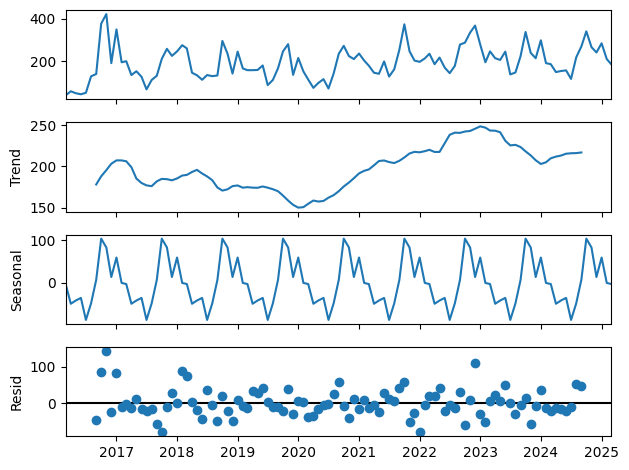

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = ha_pm[['aantal_aanvragen']]

ha_pm_decomposed = seasonal_decompose(data, model='additive')
ha_pm_decomposed.plot();

- De bovenste grafiek toont de waarnemingen
- De tweede grafiek is de langetermijntrend
- De derde grafiek toont de seizoenstrend
- De laatste grafiek toont de residuen

De puntkomma aan het einde van regel 4 is niet strikt noodzakelijk, maar als je deze weglaat, is het mogelijk dat de grafiek twee keer wordt weergegeven.

## Sources

Khan, E. (2021-01-05) *Python Code on Holt-Winters Forecasting.* Retrieved 2022-04-15 from <https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873>

Moreno, A.I. (2020-07-08) *Moving Averages with Python: Simple, cumulative and exponential moving averages with Pandas*, retrieved 2022-04-15 from <https://towardsdatascience.com/moving-averages-in-python-16170e20f6c>

Paramita (2020-12-17) *Holt winters Model, Easiest Times series Model. Additive multiplicative trend and seasonality*, retrieved 2022-04-16 from <https://www.youtube.com/watch?v=O6cUkdQeLUQ>

Perktold, J., et al. (2022-04-13) *statsmodels manual: Exponential Smoothing.* Retrieved 2022-04-15 from <https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html>